<img src="https://5264302.fs1.hubspotusercontent-na1.net/hubfs/5264302/Demo%20Asset%20Resources/CM-Demo-metric_workbench-Cover.png" width=1100 margin-left='auto' margin-right='auto'/>

While Coin Metrics **Network Data Pro** offers users the ability to analyze aggregated on-chain metrics for a variety of cryptoassets, some power users may require additional customization and granularity. Coin Metrics **ATLAS search engine** equips users with the on-chain analytical toolset they need to workshop their own custom metrics.

## Resources
This notebook demonstrates basic functionality offered by the Coin Metrics Python API Client, ATLAS, and Network Data Pro.

Coin Metrics offers a vast assortment of data for hundreds of cryptoassets. The Python API Client allows for easy access to this data using Python without needing to create your own wrappers using `requests` and other such libraries.

To understand the data that Coin Metrics offers, feel free to peruse the resources below.

- The [Coin Metrics API v4](https://docs.coinmetrics.io/api/v4) website contains the full set of endpoints and data offered by Coin Metrics.
- The [Coin Metrics Product Documentation](https://docs.coinmetrics.io/info) gives detailed, conceptual explanations of the data that Coin Metrics offers.
- The [API Spec](https://coinmetrics.github.io/api-client-python/site/api_client.html) contains a full list of functions.

## Notebook Setup

In [1]:
from os import environ
import pandas as pd
import logging
from datetime import date, datetime, timedelta
from coinmetrics.api_client import CoinMetricsClient
import json
import logging
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Markdown as md

In [2]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid",{'axes.grid' : False,'grid.linestyle': '--', 'grid.color': 'black','axes.edgecolor': 'white','font.family': ['sans-serif']})

In [3]:
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [4]:
# We recommend privately storing your API key in your local environment.
try:
    api_key = environ["CM_API_KEY"]
    logging.info("Using API key found in environment")
except KeyError:
    api_key = ""
    logging.info("API key not found. Using community client")

client = CoinMetricsClient(api_key)

2024-09-16 14:50:24 INFO     Using API key found in environment


# Block-by-Block Metrics

With **Network Data Pro**, block-by-block metrics are offered for both BTC and ETH. With **ATLAS**, however, we have the ability to retrieve block-by-block metrics for any asset in ATLAS coverage.

In this example, we quantify the total amount of USDC and USDT transferred on a block-by-block basis.

In [5]:
hours = 2
end = datetime.now()
start = end - timedelta(hours=hours)

In [6]:
# Retrieving data for both USDC and USDT (ETH chain)
asset_list = ['usdc','usdt_eth']

In [7]:
for asset in asset_list:
    print('Fetching ' + asset.upper() + ' transactions...')
    
    # ATLAS 'Get List of Transactions' function
    vars()[asset + '_tx'] = client.get_list_of_transactions_v2(
            asset=asset,
            start_time=start,
            end_time=end
    ).to_dataframe().drop_duplicates(subset=['txid'],keep='last')

Fetching USDC transactions...
Fetching USDT_ETH transactions...


### USDC Transactions

In [8]:
usdc_tx.tail()

,txid,consensus_time,tx_position,n_balance_updates,amount,block_hash,height,miner_time,min_chain_sequence_number,max_chain_sequence_number,fee
4839,e4349a2d37cb71ea25068fdae029f99903585d3c221281...,2024-09-16 14:50:23+00:00,89180189833035782,2,1047.039959,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035790,89180189833035791,0
4840,9c224f0fd2e8a82561351ace87d0b4db0e382d948ec8fe...,2024-09-16 14:50:23+00:00,89180189833035783,2,560.0,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035792,89180189833035793,0
4841,559ba39db4ccd441c3a22ac6de2536567b7e9c78280925...,2024-09-16 14:50:23+00:00,89180189833035784,2,82426.032272,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035794,89180189833035795,0
4842,fe0d66654af63c8c31f2f012daae75efaff9d91f85be58...,2024-09-16 14:50:23+00:00,89180189833035785,2,1455.127734,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035796,89180189833035797,0
4843,8651c23909accf78b1ad45cadc85eb74aeb4afe2031f50...,2024-09-16 14:50:23+00:00,89180189833035786,2,30.0,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035798,89180189833035799,0


In [9]:
# Transform balance updates into block-by-block transfer metrics with one line of code
usdc_tx_bbb = pd.DataFrame(usdc_tx.groupby('height')['amount'].sum())
usdc_tx_bbb.head()

,amount
height,
20763288,113663.822406
20763289,99292.054782
20763290,7651.824353
20763291,1018865.93048
20763292,384271.09176


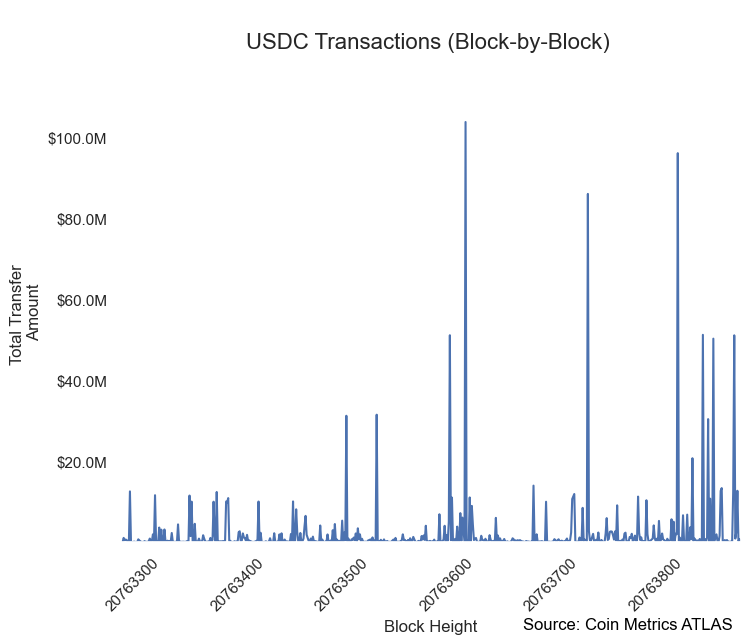

In [10]:
ax = sns.lineplot(
    data=usdc_tx_bbb,
    y=usdc_tx_bbb['amount'],
    x=usdc_tx_bbb.index
)
ax.set_xlabel("Block Height", fontsize = 12)
ax.set_ylabel("Total Transfer \nAmount", fontsize = 12)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_ticks(plt.gca().get_xticks())
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in plt.gca().get_xticks()])
ax.yaxis.set_ticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['${:,.1f}M'.format(y/1000000) for y in plt.gca().get_yticks()])
plt.ylim([usdc_tx_bbb['amount'].min(), usdc_tx_bbb['amount'].max()*1.1])
plt.xlim([usdc_tx_bbb.index[0], usdc_tx_bbb.index[-1]])
plt.annotate(
    'Source: Coin Metrics ATLAS',
    xy=(1, -0.195),
    xycoords='axes fraction',
    color='black',xytext=(-8, 0),
    textcoords='offset pixels',
    horizontalalignment='right',
    verticalalignment='bottom'
)
ax.set_title('\nUSDC Transactions (Block-by-Block) \n', fontsize = 16)
plt.show()

In [11]:
largest_tx = usdc_tx.loc[usdc_tx['amount'].idxmax()]

In [12]:
largest_tx

txid                         ca9d6c9c2e86a71c5482845abf9a8821d743bd2923fb73...
consensus_time                                       2024-09-16 14:43:11+00:00
tx_position                                                  89180035214213128
n_balance_updates                                                           10
amount                                                          50893857.89172
block_hash                   19e68e57ad114250502478a0e337ea9ee681f5d0730496...
height                                                                20763845
miner_time                                           2024-09-16 14:43:11+00:00
min_chain_sequence_number                                    89180035214213140
max_chain_sequence_number                                    89180035214213149
fee                                                                          0
Name: 4549, dtype: object

In [13]:
md('<br><font size="3.5">Transaction info can also be viewed in the **ATLAS** graphical user interface:<br><br>**Largest Transaction:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdc&tx_hash=' + str(largest_tx.txid) )

<br><font size="3.5">Transaction info can also be viewed in the **ATLAS** graphical user interface:<br><br>**Largest Transaction:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdc&tx_hash=ca9d6c9c2e86a71c5482845abf9a8821d743bd2923fb73cb87177e6e83d86d9e

### USDT Transactions

In [14]:
usdt_eth_tx.tail()

,txid,consensus_time,tx_position,n_balance_updates,amount,block_hash,height,miner_time,min_chain_sequence_number,max_chain_sequence_number,fee
15151,0493f4f094032f2fc01a6a67d1bb7b18cad05d6b3727eb...,2024-09-16 14:50:23+00:00,89180189833035822,2,0.111413,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035890,89180189833035891,0
15152,616e8f6cbb50ed258575820c0cdac2b4d768bbb7c4cd7a...,2024-09-16 14:50:23+00:00,89180189833035823,2,75.0,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035892,89180189833035893,0
15153,bdb7bee6537d63c72055b0b015f9a07e6129aff9fb2c43...,2024-09-16 14:50:23+00:00,89180189833035824,2,5.0,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035894,89180189833035895,0
15154,38988bf92c9a968df5d7db4c0307a08a3c857d6879e7c0...,2024-09-16 14:50:23+00:00,89180189833035825,2,211.714933,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035896,89180189833035897,0
15155,562fc4b718a681f189cf9aa452937d49527fce7a265193...,2024-09-16 14:50:23+00:00,89180189833035826,2,300.0,0a590f6b2dd842efa8a7f1a0ebce2746cdb20a2c069bb8...,20763881,2024-09-16 14:50:23+00:00,89180189833035898,89180189833035899,0


In [15]:
# Transform balance updates into block-by-block transfer metrics with one line of code
usdt_tx_bbb = pd.DataFrame(usdt_eth_tx.groupby('height')['amount'].sum())
usdt_tx_bbb.head()

,amount
height,
20763288,523600.540279
20763289,149740.436168
20763290,143192.868507
20763291,79358.83167
20763292,1944483.921281


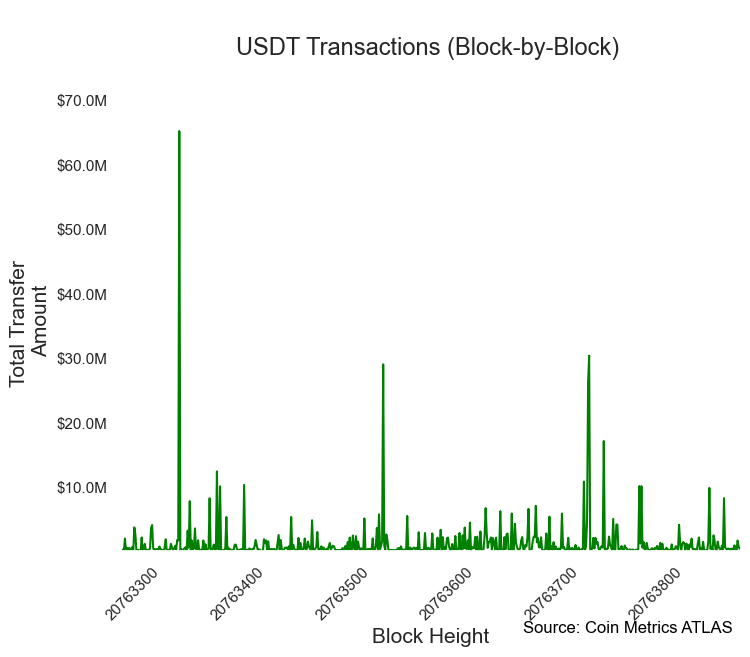

In [16]:
ax = sns.lineplot(
    data=usdt_tx_bbb,
    y=usdt_tx_bbb['amount'],
    x=usdt_tx_bbb.index,
    color='green'
)
ax.set_xlabel("Block Height", fontsize = 15)
ax.set_ylabel("Total Transfer \nAmount", fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_ticks(plt.gca().get_xticks())
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in plt.gca().get_xticks()])
ax.yaxis.set_ticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['${:,.1f}M'.format(y/1000000) for y in plt.gca().get_yticks()])
plt.ylim([usdt_tx_bbb['amount'].min(), usdt_tx_bbb['amount'].max()*1.1])
plt.xlim([usdt_tx_bbb.index[0], usdt_tx_bbb.index[-1]])
plt.annotate(
    'Source: Coin Metrics ATLAS',
    xy=(1, -0.195), 
    xycoords='axes fraction',color='black',
    xytext=(-8, 6), 
    textcoords='offset pixels',
    horizontalalignment='right',
    verticalalignment='bottom'
)
ax.set_title('\nUSDT Transactions (Block-by-Block) \n', fontsize = 17);

In [17]:
largest_usdt_tx = usdt_eth_tx.loc[usdt_eth_tx['amount'].idxmax()]
largest_usdt_tx

txid                         ec6ca03c17cea5c528378bbfa65ef1fb7471395c74a6e8...
consensus_time                                       2024-09-16 13:01:47+00:00
tx_position                                                  89177883435597842
n_balance_updates                                                            2
amount                                                              65000000.0
block_hash                   20c5ffdb60ac0aecbe1827788f2d448c8f0d8ab72827f3...
height                                                                20763344
miner_time                                           2024-09-16 13:01:47+00:00
min_chain_sequence_number                                    89177883435597866
max_chain_sequence_number                                    89177883435597867
fee                                                                          0
Name: 1462, dtype: object

In [18]:
md('<br><font size="3.5">Transaction info can also be viewed in the **ATLAS** graphical user interface:<br><br>**Largest Transaction:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdt_eth&tx_hash=' + str(largest_usdt_tx.txid) )

<br><font size="3.5">Transaction info can also be viewed in the **ATLAS** graphical user interface:<br><br>**Largest Transaction:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdt_eth&tx_hash=ec6ca03c17cea5c528378bbfa65ef1fb7471395c74a6e89d7344be0932c94a1c

# Cross-Asset Metrics

With **Network Data Pro**, users have the ability to retrieve aggregated daily transfers for specific assets such as USDC and USDT. With **ATLAS**, however, we have the ability to create more customized, granular metrics. 

In this example, we quantify the total size of **transactions where USDT and USDC are transferred simultaneously**, on a block-by-block basis.

In [19]:
usdc_tx['USDC Amount'] = usdc_tx['amount']
usdt_eth_tx['USDT Amount'] = usdt_eth_tx['amount']

merged = pd.merge(usdc_tx[['height','USDC Amount','txid']], usdt_eth_tx[['USDT Amount','txid']], on ='txid')
merged['Total Amount'] = merged['USDT Amount'] + merged['USDC Amount']

In [20]:
merged.tail()

,height,USDC Amount,txid,USDT Amount,Total Amount
310,20763867,149.890998,6288646aa12f6e17854e0e567d33e59baadb000fcccaa7...,225.073709,374.964707
311,20763868,20.215977,33b82dd5137e8610868966f7738467b3cca7aadee525f0...,40.291364,60.507341
312,20763872,59998.50869,973b87937c485db542909d2c69730a3d5ce41f78cfe01e...,60000.0,119998.50869
313,20763877,160.087258,97d6b653d389cb1b1a31e26d555e1e9f182633295b0e88...,2087.301319,2247.388577
314,20763878,56908.231643,8bd1605839db7cf700ac524012a09c71cf9add77d0edec...,23055.975936,79964.207579


In [21]:
last_tx = merged.iloc[-1]
txhash = last_tx.txid

In [22]:
md('<br><font size="3.5">Transaction info can also be viewed in the **ATLAS** graphical user interface:<br><br>**USDC:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdc&tx_hash=' + str(txhash) + '<br>**USDT:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdt_eth&tx_hash=' + str(txhash))

<br><font size="3.5">Transaction info can also be viewed in the **ATLAS** graphical user interface:<br><br>**USDC:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdc&tx_hash=8bd1605839db7cf700ac524012a09c71cf9add77d0edec1b81a8342285d092db<br>**USDT:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdt_eth&tx_hash=8bd1605839db7cf700ac524012a09c71cf9add77d0edec1b81a8342285d092db

In [23]:
# Determine total amount of USDT + USDC transferred on a block-by-block basis
both_tx_bbb = pd.DataFrame(merged.groupby('height')['Total Amount'].sum())
both_tx_bbb

,Total Amount
height,
20763294,161872.380601
20763296,195635.133756
20763306,28362.220094
20763309,7325.095764
20763316,796760.645528
...,...
20763867,374.964707
20763868,60.507341
20763872,119998.50869


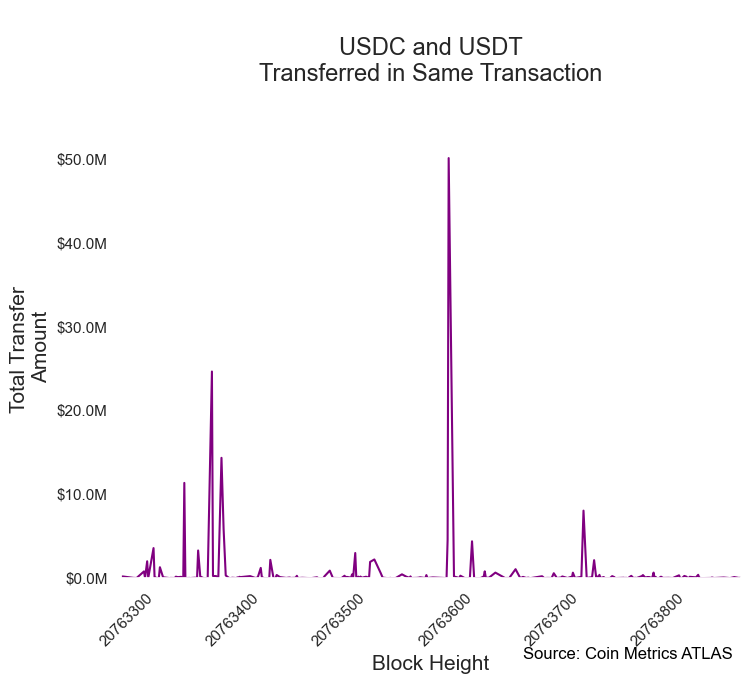

In [24]:
ax = sns.lineplot(
    data=both_tx_bbb,
    y=both_tx_bbb['Total Amount'],
    x=both_tx_bbb.index,
    color='purple'
)
ax.set_xlabel("Block Height", fontsize = 15)
ax.set_ylabel("Total Transfer \nAmount", fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_ticks(plt.gca().get_xticks())
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in plt.gca().get_xticks()])
ax.yaxis.set_ticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['${:,.1f}M'.format(y/1000000) for y in plt.gca().get_yticks()])
plt.ylim([both_tx_bbb['Total Amount'].min(), both_tx_bbb['Total Amount'].max()*1.1])
plt.xlim([both_tx_bbb.index[0], both_tx_bbb.index[-1]])
plt.annotate(
    'Source: Coin Metrics ATLAS',
    xy=(1, -0.195),
    xycoords='axes fraction',
    color='black',
    xytext=(-8, 6), 
    textcoords='offset pixels',
    horizontalalignment='right',
    verticalalignment='bottom'
)
ax.set_title('\nUSDC and USDT\nTransferred in Same Transaction\n', fontsize = 17);

# Entity-Based Metrics

With **ATLAS,** we can derived our own metrics based on externally-sourced tagged addresses.

In this example, we leverage our catalog of Uniswap liquidity pool contract addresses to **estimate USDC inflows and DEX Supply** for major trading pairs.

### Retrieving DEX Markets

In [25]:
defi_mkts = client.reference_data_markets(
    exchange="uniswap_v3_eth",
    asset="usdc",
    page_size=1000
).to_dataframe()

In [26]:
defi_mkts.tail()

,market,exchange,base,quote,pair,symbol,type,size_asset,margin_asset,strike,...,order_amount_min,order_amount_max,order_price_increment,order_price_min,order_price_max,order_size_min,order_taker_fee,order_maker_fee,margin_trading_enabled,experimental
372,uniswap_v3_eth-agg-wbtc-usdc-spot,uniswap_v3_eth,wbtc,usdc,wbtc-usdc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True
373,uniswap_v3_eth-agg-wsteth-usdc-spot,uniswap_v3_eth,wsteth,usdc,wsteth-usdc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True
374,uniswap_v3_eth-agg-xaut_2_eth-usdc-spot,uniswap_v3_eth,xaut_2_eth,usdc,xaut_2_eth-usdc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True
375,uniswap_v3_eth-agg-xsgd_eth-usdc-spot,uniswap_v3_eth,xsgd_eth,usdc,xsgd_eth-usdc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True
376,uniswap_v3_eth-agg-yfi-usdc-spot,uniswap_v3_eth,yfi,usdc,yfi-usdc,<NA>,spot,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,True


In [27]:
defi_list = defi_mkts.contract_address.dropna().tolist()
defi_list[0:5]

['2ee7e6e459fffbbc655f09f2e1b3131abf98c397',
 '735a26a57a0a0069dfabd41595a970faf5e1ee8b',
 'bafead7c60ea473758ed6c6021505e8bbd7e8e5d',
 '5e35c4eba72470ee1177dcb14dddf4d9e6d915f4',
 '0eff06710d737c7548c8177ba42e3abdcf3477a7']

In [28]:
len(defi_list)

262

In [29]:
day_end = datetime.now()
day_start = day_end - timedelta(days=1)

In [30]:
defi_balance = client.get_list_of_balance_updates_v2(
    asset=asset,
    accounts=defi_list,
    start_time=day_start,
    end_time=day_end,
    page_size=10000
).to_dataframe()

In [31]:
defi_balance

,chain_sequence_number,account,account_creation_height,change,previous_balance,new_balance,transaction_sequence_number,n_debits,n_credits,block_hash,height,consensus_time,credit,total_received,total_sent,previous_debit_height,previous_credit_height,previous_chain_sequence_number,txid
0,89149553831313431,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,0.496,8838821.586622,8838822.082622,1,449800,479578,7ed29942135604bafad3c2820bd06b9757c2ef380e1a87...,20756748,2024-09-15 14:55:23+00:00,True,52777858266.775307,52769019444.692688,20756718,20756719,89149429277261831,fa419c42e98bb83b53529891a8ba32768709eb8b254fc2...
1,89149738514907201,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,588.944621,8838822.082622,8839411.027243,0,449800,479579,304588d181e196c16aedf2a9721aa6e27ae16484662d13...,20756791,2024-09-15 15:03:59+00:00,True,52777858855.719925,52769019444.692688,20756718,20756748,89149553831313431,9c6bfbf5f155940e832deb6150585f4022f5b07d65c8c8...
2,89149777169612812,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,-287.318755,8839411.027243,8839123.708488,0,449801,479579,19b757a736ac358fe9f269806a985eb32a8549b01ebfa3...,20756800,2024-09-15 15:05:47+00:00,False,52777858855.719925,52769019732.011436,20756718,20756791,89149738514907201,2095dd79f657e109c82e0589c610a313b873cfa5c5e874...
3,89149794349482033,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,1801.0,8839123.708488,8840924.708488,0,449801,479580,148424378d89962dee8f9bd2c63de38cb13ff02297ed31...,20756804,2024-09-15 15:06:35+00:00,True,52777860656.719925,52769019732.011436,20756800,20756791,89149777169612812,09498f7b3ec4307371fc300365d99a0d9eba79a5c69b68...
4,89149957558239248,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,-399.070421,8840924.708488,8840525.638067,0,449802,479580,c51c6f67d2af4dcb65c712c13ed8bfc6f87051b60e2e50...,20756842,2024-09-15 15:14:11+00:00,False,52777860656.719925,52769020131.081856,20756800,20756804,89149794349482033,3c89ecbd238ff474415db6b9d5b4f1821667ea4cb08061...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,89179966494736406,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,-2.047597,11071334.757652,11071332.710055,0,450269,480108,9468ed9db151616d84f3206a3c865f15cd1a844d1dabce...,20763829,2024-09-16 14:39:59+00:00,False,52795130311.495941,52784058978.785889,20763827,20763803,89179957904801814,b7292f6c1fa6f8e32b9f0934ed1f2ae3564335bee8f755...
1032,89179970789703720,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,-57.627626,11071332.710055,11071275.082429,0,450270,480108,6db5093f808e69f6e0871973efb6ef56e845c595c7b357...,20763830,2024-09-16 14:40:11+00:00,False,52795130311.495941,52784059036.413513,20763829,20763803,89179966494736406,3aaf4aa1784b63c9498315d8d3e6efb39b81bb95cd03c7...
1033,89180005149442094,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,-28863.215208,11071275.082429,11042411.867221,1,450271,480108,1edac3c91bbe0bb36fb8c807ed9e41b8f7ee200f16df59...,20763838,2024-09-16 14:41:47+00:00,False,52795130311.495941,52784087899.628723,20763830,20763803,89179970789703720,4756f0560c8b10673f64b914c1bdc938fd14166a0fbfd6...
1034,89180005149442110,3416cf6c708da44db2624d63ea0aaef7113527c6,13609065,-29995.561842,11042411.867221,11012416.305379,0,450272,480108,1edac3c91bbe0bb36fb8c807ed9e41b8f7ee200f16df59...,20763838,2024-09-16 14:41:47+00:00,False,52795130311.495941,52784117895.190559,20763838,20763803,89180005149442094,b9ea155e1f0d6e98a1cb085f4fd4b4efcd5e7df9bbdd35...


### Retrieve DEX Inflows

In [32]:
defi_inflow = defi_balance[defi_balance.change > 0]

In [33]:
largest_inflow = defi_balance.loc[defi_balance['change'].idxmax()]
largest_inflow

chain_sequence_number                                             89166329973571601
account                                    3416cf6c708da44db2624d63ea0aaef7113527c6
account_creation_height                                                    13609065
change                                                               2561701.979951
previous_balance                                                     8861581.886413
new_balance                                                         11423283.866364
transaction_sequence_number                                                       2
n_debits                                                                     450061
n_credits                                                                    479906
block_hash                        bbce1f72a7384588aaafd053e449b38c93cd07c5d8e997...
height                                                                     20760654
consensus_time                                            2024-09-16 03:59:3

In [34]:
largest_inflow.txid
md('<br><font size="3.5">Transaction info can also be viewed in the **ATLAS** graphical user interface:<br><br>**Largest Transaction:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdc&tx_hash=' + str(largest_inflow.txid) )

<br><font size="3.5">Transaction info can also be viewed in the **ATLAS** graphical user interface:<br><br>**Largest Transaction:** <br>https://atlas.coinmetrics.io/transaction-details?asset=usdc&tx_hash=efdc8d8347d53459d3a581d9700b291cb75311f63289ea0d1859b358d91d8b7f

In [35]:
defi_inflow = pd.DataFrame(defi_inflow[['consensus_time','account','change','height']])
defi_inflow_sum = pd.DataFrame(defi_inflow.groupby('height')['change'].sum())

In [36]:
defi_inflow_sum

,change
height,
20756748,0.496
20756791,588.944621
20756804,1801.0
20756883,20.0
20756906,28.88709
...,...
20763786,90000.0
20763794,1000.0
20763798,33356.45


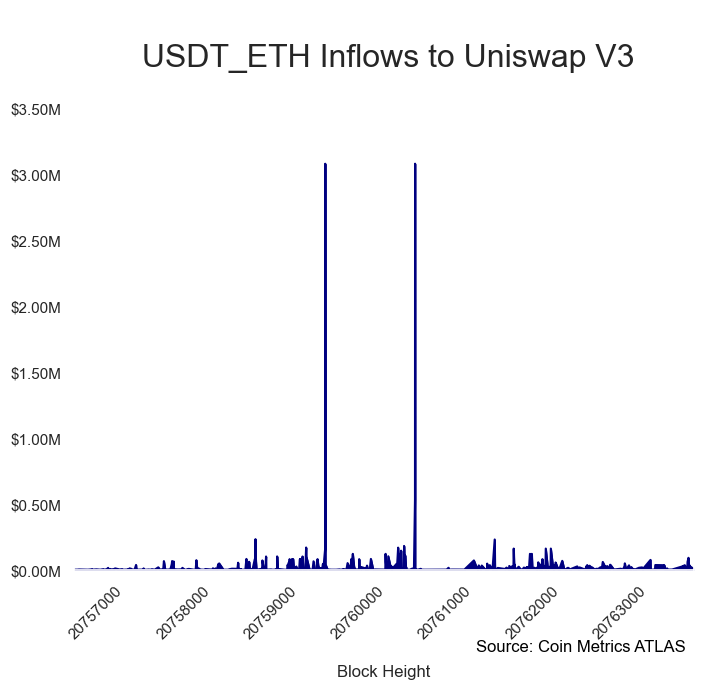

In [37]:
ax = defi_inflow_sum['change'].plot.area(color='navy')
plt.title('\n ' + asset.upper() + ' Inflows to Uniswap V3\n',fontdict={'fontsize':23})
ax.set_xlabel("\nBlock Height")
ax.yaxis.set_ticks(plt.gca().get_yticks())
plt.setp(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_ticks(plt.gca().get_xticks())
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in plt.gca().get_xticks()])
plt.xlim([defi_inflow_sum.index[0], defi_inflow_sum.index[-1]])
plt.annotate(
    'Source: Coin Metrics ATLAS',
    xy=(1, -0.195),
    xycoords='axes fraction',
    color='black',
    xytext=(-8, 6),
    textcoords='offset pixels',
    horizontalalignment='right',
    verticalalignment='bottom'
)
plt.gca().set_yticklabels(['${:,.2f}M'.format(x/1000000) for x in plt.gca().get_yticks()]);

### Retrieve DEX Supply

In [38]:
defi_new_bal = pd.DataFrame(defi_balance[['consensus_time','account','new_balance','height']])
defi_new_bal = defi_new_bal.sort_values(by='height')
defi_new_bal = pd.DataFrame(defi_new_bal.drop_duplicates(subset=['account','height'],keep='last'))

In [39]:
defi_new_bal

,consensus_time,account,new_balance,height
0,2024-09-15 14:55:23+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,8838822.082622,20756748
1,2024-09-15 15:03:59+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,8839411.027243,20756791
2,2024-09-15 15:05:47+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,8839123.708488,20756800
3,2024-09-15 15:06:35+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,8840924.708488,20756804
4,2024-09-15 15:14:11+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,8840525.638067,20756842
...,...,...,...,...
1030,2024-09-16 14:39:35+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,11071334.757652,20763827
1031,2024-09-16 14:39:59+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,11071332.710055,20763829
1032,2024-09-16 14:40:11+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,11071275.082429,20763830
1033,2024-09-16 14:41:47+00:00,3416cf6c708da44db2624d63ea0aaef7113527c6,11042411.867221,20763838


In [40]:
bal_updates_pivot = defi_new_bal.pivot(index="height",columns="account",values="new_balance")
bal_updates_pivot = bal_updates_pivot.ffill()
bal_updates_pivot = bal_updates_pivot.bfill()

In [41]:
bal_updates_w_zeros = bal_updates_pivot.fillna(0)

In [42]:
column_list = list(bal_updates_w_zeros)
bal_updates_w_zeros["sum"] =bal_updates_w_zeros[column_list].sum(axis=1)

In [43]:
bal_updates_w_zeros

account,3416cf6c708da44db2624d63ea0aaef7113527c6,7858e59e0c01ea06df3af3d20ac7b0003275d4bf,ee4cf3b78a74affa38c6a926282bcd8b5952818d,sum
height,,,,
20756748,8838822.082622,1201350.942506,9178.353003,1.004935e+07
20756791,8839411.027243,1201350.942506,9178.353003,1.004994e+07
20756800,8839123.708488,1201350.942506,9178.353003,1.004965e+07
20756804,8840924.708488,1201350.942506,9178.353003,1.005145e+07
20756842,8840525.638067,1201350.942506,9178.353003,1.005105e+07
...,...,...,...,...
20763827,11071334.757652,1250073.026459,9178.353003,1.233059e+07
20763829,11071332.710055,1250073.026459,9178.353003,1.233058e+07
20763830,11071275.082429,1250073.026459,9178.353003,1.233053e+07


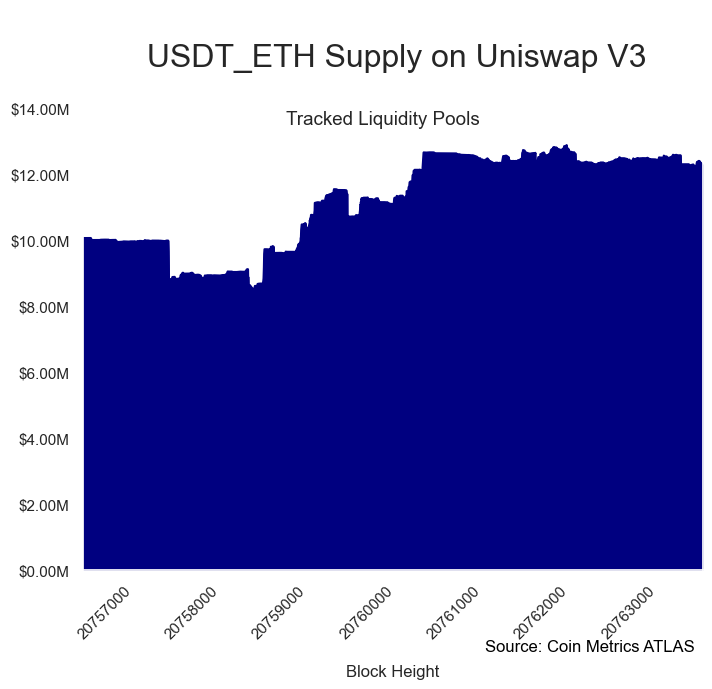

In [44]:
ax = bal_updates_w_zeros['sum'].plot.area(color='navy')
plt.title('\n ' + asset.upper() + ' Supply on Uniswap V3\n',fontdict={'fontsize':23})
plt.suptitle('\n\n\nTracked Liquidity Pools\n',size=13.5)
ax.set_xlabel("\nBlock Height")
ax.yaxis.set_ticks(plt.gca().get_yticks())
plt.setp(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_ticks(plt.gca().get_xticks())
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in plt.gca().get_xticks()])
plt.xlim([bal_updates_w_zeros.index[0], bal_updates_w_zeros.index[-1]])
plt.annotate('Source: Coin Metrics ATLAS',xy=(1, -0.195), xycoords='axes fraction',color='black',xytext=(-8, 6), textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')
plt.gca().set_yticklabels(['${:,.2f}M'.format(x/1000000) for x in plt.gca().get_yticks()]);